In [1]:
import piplite 
await piplite.install('yellowbrick')

In [2]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import numpy as np 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale
df = pd.read_csv("students.csv")
print(df.head())

  withdraw6th  1st  2nd  3rd  4th  5th
0         Yes  4.2  4.3  4.2  4.0  3.8
1          No  3.5  3.0  3.0  3.0  3.0
2          No  4.1  4.0  4.0  4.2  4.2
3         Yes  2.1  2.0  3.0  2.0  2.0
4         Yes  3.5  4.5  4.5  4.0  3.7


In [3]:
features = df.drop(df.columns[0], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
print("\nScaled DataFrame:")
print(df_scaled.head())


Scaled DataFrame:
        1st       2nd       3rd       4th       5th
0  0.766329  0.806500  0.616297  0.377366  0.127550
1 -0.094254 -0.691286 -1.117038 -0.880521 -0.892849
2  0.643389  0.460857  0.327408  0.628943  0.637750
3 -1.815421 -1.843429 -1.117038 -2.138407 -2.168349
4 -0.094254  1.036929  1.049631  0.377366  0.000000


In [4]:
np.random.seed(8953)
kmeans = KMeans(n_clusters=2, random_state=8953)
kmeans_result = kmeans.fit(df_scaled)
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


Cluster Centers:
[[ 0.61265347  0.80650014  0.79685273  0.75473191  0.66963705]
 [-0.70017539 -0.92171445 -0.91068883 -0.86255075 -0.76529948]]

Cluster Labels:
[0 1 0 1 0 1 1 0 0 0 1 1 0 0 1]


/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


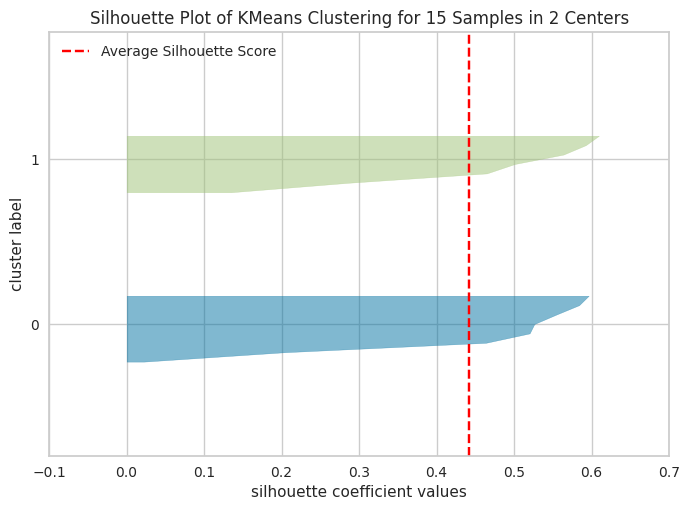

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 15 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [5]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()